# Module Seven Final Project

**Sean Brooks**



# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [Data Description](#Data-Description)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
        - [Null Values](#Null-Values)    
        - [Group By Counts](#Group-By-Counts)    
        - [Histograms](#Histograms)    
        - [Sales Price](#Sales-Price)    
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
        - [Correlation Variable Sets](#Correlation-Variable-Sets)
        - [Correlation Visualizations](#Correlation-Visualizations)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
        - [Final Proofing](#Final-Proofing)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

I built a model to predict the sales price of homes.  I had two datasets.  One to build the model on and one to test the validity of that model.   In summary, after massaging some of the data and looking at the correlation of independent variables upon the sales price, we used linear regression modeling to predict the logarithmic sales price (and converted the log sales price back to actual in the final data).

I massaged the data in several different ways and tested out a combination of variables in the model.  I used several different techniques to open up the number of numeric variables available for modeling.  I tried out some one-hot encoding and some conversions of qualitative rankings into a numeric ranking. 

I tested several combinations of variables but the most effective was including any variable with a correlation value > 0.5.

My final model consisted of 15 variables and had an Rsquared = 0.864 on the training dataset and an Rsquared = 0.819 on the test dataset.  

This means that the model and its independent variables explains greater than 80% of the Sales Price.

[Back to top](#Index)


## 1. Introduction

The flow of my project to build a Home Sales model is as follows.

1. Begin by importing the necessary packages needed to achieve my goals.  This includes numpy, matplotlib, pandas, and seaborn.  

2. Ingest the testing data and explore several factors within the data.  Is their any cleansing that we should do with the data?  To see, we looked at null values.  Can we convert some of the string variables to numeric in order to leverage the variable to be used in the regression model. To do this, we looked at counts and histograms of many of the variables. There are several qualitative variables which lent themselves to easy conversion to a numeric.  As expected, some of them popped in the correlation step.  In addition, I did a deep dive into the distribution of our dependant variable, Sales Price, to see if it makes sense to adjust this field should the distribution of the values suggest leveraging something like converting to a log.
    
3. Cleanse the data based on above findings.  I used several tools like interpolation and filling in null values with means for variables that had some missing values.  I thought something like 'Frontage' lent itself to filling in nulls with an average since every property should have some sort of frontage value.  I also converted several of the qualitative string variables into numerics as dicussed earlier.

4. Correlation:  After creating a numeric training set, what correlation do we see between independant numeric variables and the dependent sales price we are trying to predict.  Settle on what variables we'd like to include in the regression model.  I decided to settle on any variables with a correlation > .5  .  I tested out several combinations and tested less variables in the model but in general, the more variables, as long as they were at least moderately correlated, I saw improvements in my Rsquared value.
    
5. Linear Regression:  Develop the Linear Regression Model and see how it fits.  I tested out various combinations of highly correlated variables.  Python has a great tools to automatically develop the equation and see the fit on your training data. I also created numerous visualizations to illuminate the results of the model.

6. Model Test:  Part of the testing of the Model is all about seeing how it performs on the test data.  So you take the equation and run it against the test data which wasn't used to build the model and see how well it predicts the sales price.  I created a scatter plot and histogram which also illuminate the tight fit visually in addition to the Rsquared value.
    

[Back to top](#Index)

## 2. The Data



[Back to top](#Index)

### 2.1 Import the Data

So the first step is reading in houseSmalldata.csv  with the read_csv function from panda.  
To make sure we have the proper data, we'll just look at the shape and top few records.  We were provided a description of the data as well.  Some of the string variables could be converted to numerics to help with modeling and we'll do that in later steps.

We'll begin exploring this data as well as cleansing in the next steps.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv("houseSmalldata.csv")

data.shape


(100, 82)

In [72]:
#Let's look at the first few records to make sure we've read the data properly
data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


[Back to top](#Index)

### Data Description
The following is the provided data description.  I am including this so I can refer back to this at later times.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


[Back to top](#Index)

### 2.2 Data Exploration

So as part of the data exploration, I leveraged the description of the data above, created some scatter plots to show relationship of highly correlated variables with our Dependent Variable - Sales Price, and created some counts with the groupby function to understand the values and distribution of some of the variables.

The description of the data is nice because you can use it to provide common sense to your modeling.  For example, a field like Kitchen Quality feels as if it could be a powerful predictor if converted to numeric as this something a lot of home buyers would find highly valueable.

I also looked at the general distribution of the Sales Price to see if it make sense to alter how we stucture our modeling.

Later on I have provided the scatter plots to see how our data is correlated with the sales price.

[Back to top](#Index)

#### Null Values

Let's take a look at which fields have a lot of null values.   This will help me eliminate variables that are sparsely populated or identify variables I could fill in with some mean data.

Items like PoolQC and Alley and Misc Feature are predominantly Null so we will not include them in our models.

I'll replace a few values with means but interpolate others to clean up our Null values later on during the prep/cleanup step.



In [74]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[0:20])
print(nulls)

                0
PoolQC        100
Alley          94
MiscFeature    91
Fence          77
MasVnrType     60
FireplaceQu    54
LotFrontage    14
GarageType      6
GarageYrBlt     6
GarageFinish    6
GarageQual      6
GarageCond      6
BsmtFinType1    3
BsmtQual        3
BsmtCond        3
BsmtExposure    3
BsmtFinType2    3
KitchenQual     0
Functional      0
KitchenAbvGr    0


#### Group By Counts

I explored a few fields to see how their counts looked.  I decided to leverage some histograms in some of the following steps.

In [75]:
# I explored a handful
print(data.groupby("Neighborhood").count())
print(data.groupby("LotConfig").count())
print(data.groupby("SaleCondition").count())
print(data.groupby("MiscFeature").count())




              Unnamed: 0  Id  MSSubClass  MSZoning  LotFrontage  LotArea  \
Neighborhood                                                               
BrkSide                5   5           5         5            5        5   
ClearCr                1   1           1         1            1        1   
CollgCr               14  14          14        14           12       14   
Crawfor                2   2           2         2            2        2   
Edwards                3   3           3         3            3        3   
Gilbert                5   5           5         5            2        5   
IDOTRR                 5   5           5         5            5        5   
MeadowV                2   2           2         2            2        2   
Mitchel                4   4           4         4            4        4   
NAmes                 21  21          21        21           17       21   
NWAmes                 1   1           1         1            0        1   
NoRidge     

[Back to top](#Index)

#### Histograms

I also explored some of our fields with Histograms.  Histograms are great visualizations to see the distribution
of some of your fields.  I decided to convert the KitchenQual variable and some of the other Qual variables into numerics.

KitchnQual, LotConfig, SaleCondition were some chosen fields I decided to look at and I thought could be pretty strong condenders for inclusion in the model.

Text(0.5, 1.0, 'LotConfig')

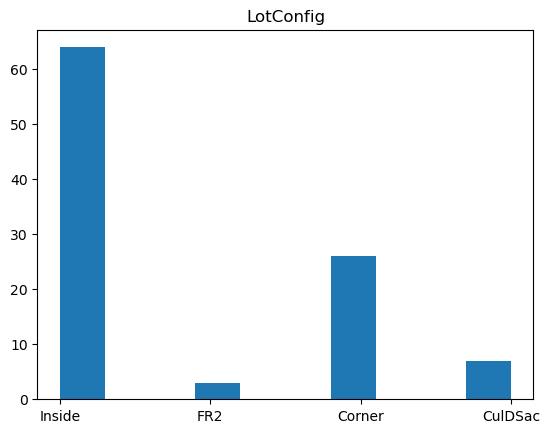

In [76]:
plt.hist(data['LotConfig'])
plt.title('LotConfig')

Text(0.5, 1.0, 'SaleCondition')

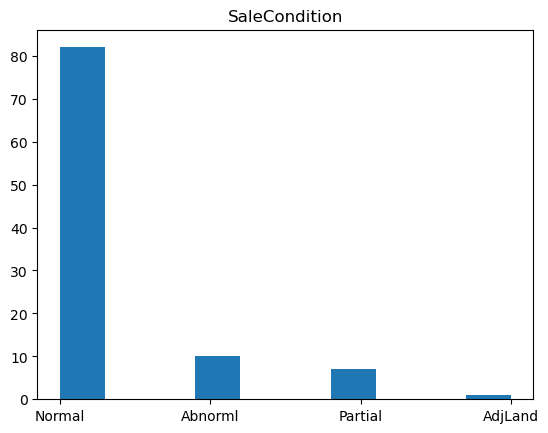

In [77]:
plt.hist(data['SaleCondition'])
plt.title('SaleCondition')

Text(0.5, 1.0, 'KitchenQual')

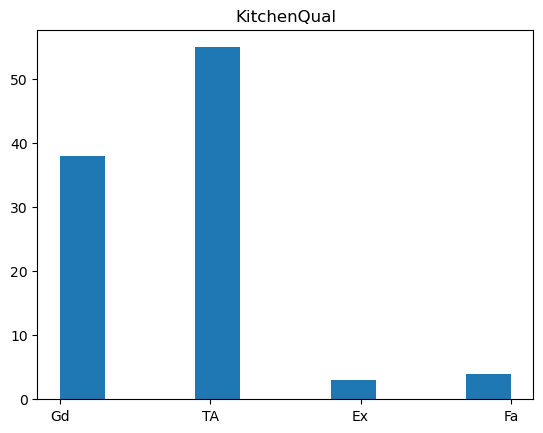

In [78]:
plt.hist(data['KitchenQual'])
plt.title('KitchenQual')

[Back to top](#Index)

#### Sales Price

Since we are trying to predict Sales Price.  We want to take a look at the distribution and relative skew of the sales price.

"Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution.  It is an important statistical methodology that is used to estimate the asymmetrical behavior rather than computing frequency distribution." 
https://www.geeksforgeeks.org/how-to-calculate-skewness-and-kurtosis-in-python/


It looks like we have a logarthimic skew with a skew value of > 1.  If we convert to a logarthmic value, we can have a more normalized distribution.  We can see the new skew value is closer to 0 which is a sign we have a more normal distribution.  I will go ahead and predict this value and convert back to salesprice after me model and predict.



1.1783462304851948

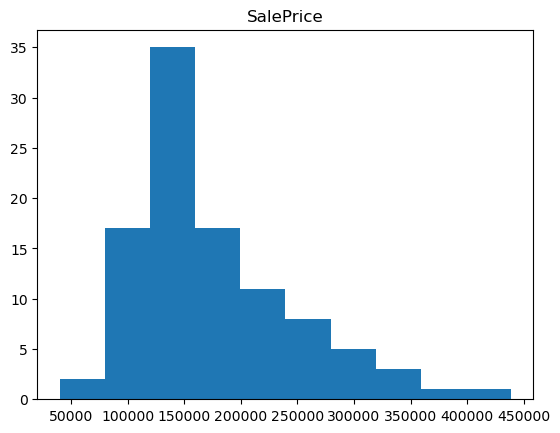

In [79]:
salePrice = data['SalePrice']

plt.hist(salePrice)
plt.title('SalePrice')
salePrice.skew()

-0.09632240207755555

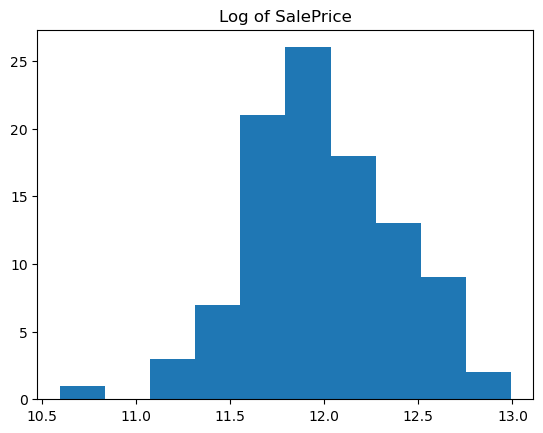

In [80]:
plt.hist(np.log(salePrice))
plt.title('Log of SalePrice')
np.log(salePrice).skew()

[Back to top](#Index)

### 2.3 Data Preparation

I decided to do the following with regards to data preparation
1. Fill in mean values for a few null variables.  I leveraged the fillna and mean function.
2. Convert several of the Qual Variables to a Numeric so they can be used for regression modeling.  I used the map function which is simple and straight forward.
3. I also tested out a handful of variables for some one-hot encoding.  I didn't include them all in here because the variables did not pop in my correlation tests.  I did include 1 as wall as a conversion on the MSZoning flag.
4. Create a training dataset with 100 records, convereted SalesPrice to logarithmic Sales Price, and a dataset that is entirely numbers.  This will feed in nicely to the correlation step.
5. I repaired other null values through interpolation and confirmed with an isnull().sum check.




In [81]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(), inplace=True)

data['GarageQual'] = data['GarageQual'].map({'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NA': 1, 'Na': 1 })
data['KitchenQual'] = data['KitchenQual'].map({'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NA': 1, 'Na': 1 })    
data['ExterQual'] = data['ExterQual'].map({'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NA': 1, 'Na': 1 })
data['ExterCond'] = data['ExterCond'].map({'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NA': 1, 'Na': 1 })    
data['BsmtQual'] = data['BsmtQual'].map({'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NA': 1, 'Na': 1 })    
data['BsmtCond'] = data['BsmtCond'].map({'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NA': 1, 'Na': 1 })  
  
    
#these both work
data['MSFlag'] = np.where(data['MSZoning']=='RL', 1, 0)
data2 = data.join(pd.get_dummies(data['SaleCondition'], dtype=int))

    
train = data2.iloc[0:100,:]

salePrice = train['SalePrice']
train['SalePrice'] = np.log(salePrice)

train2 = train.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
print(sum(train2.isnull().sum() != 0))

0


We had numerous variables that could be converted from descriptive to numeric and I thought could lend itself to being predictive.  I didn't do it with all of them but chose a handful to see if they ended up in our correlation steps below.


[Back to top](#Index)

### 2.4 Correlation


So the correlation function is a great tool to see how your variables are correlated with your dependant variable.  I double checked the shape of my numeric dataset to make sure I have the right number of numeric variables and I wanted to make sure some of my converted variables were identified as numeric.

I one hot encoded a lot of variables and explored the correlation for those and all variables.  The one hot encoded variables did not pop but I was pleased to see that variables I converted to numeric like BsmtQual and KitchenQual showed strong correlation.

I created 4 sets of variable to use for training and testing based on different cutoff thresholds in correlation values.

In [82]:
#select numeric columns
#calculate correlation fact
numeric = train2.select_dtypes(include=[np.number])
numeric.shape

(100, 50)

In [83]:
corr=numeric.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.843360
BsmtQual         0.722669
GrLivArea        0.700019
YearBuilt        0.698622
KitchenQual      0.691119
ExterQual        0.688503
GarageArea       0.685404
GarageCars       0.658574
TotalBsmtSF      0.639880
GarageYrBlt      0.634819
YearRemodAdd     0.587051
FullBath         0.569660
1stFlrSF         0.567244
MasVnrArea       0.532881
TotRmsAbvGrd     0.518780
Fireplaces       0.498968
LotArea          0.453226
MSFlag           0.438709
WoodDeckSF       0.413828
HalfBath         0.344438
OpenPorchSF      0.339115
2ndFlrSF         0.334656
LotFrontage      0.316800
BsmtFinSF1       0.306323
BsmtUnfSF        0.300776
BedroomAbvGr     0.276200
Partial          0.263363
MoSold           0.211134
GarageQual       0.184339
BsmtFullBath     0.173979
BsmtCond         0.139251
ExterCond        0.108785
ScreenPorch      0.069942
Normal           0.011485
3SsnPorch        0.005216
BsmtHalfBath    -0.009409
MSSubClass      -0.088061
OverallCond 

[Back to top](#Index)

#### Correlation Variable Sets

I tested out several different combinations of variables to see how my model performed.  In general, I saw the best results by including all variables that showed at least a moderate correlation and a value of 0.5 or greater.  This resulted in 15 variables to be included in the model.  I pulled the column names and created an index for each correlation threshold so I could use them later to develop models and test them later.

In [84]:
# > .5
corr=numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:16].index
print(type(cols))
print(cols)

<class 'pandas.core.indexes.base.Index'>
Index(['SalePrice', 'OverallQual', 'BsmtQual', 'GrLivArea', 'YearBuilt',
       'KitchenQual', 'ExterQual', 'GarageArea', 'GarageCars', 'TotalBsmtSF',
       'GarageYrBlt', 'YearRemodAdd', 'FullBath', '1stFlrSF', 'MasVnrArea',
       'TotRmsAbvGrd'],
      dtype='object')


In [85]:
# > .8 
corr2 =numeric.corr()
cols2 = corr2['SalePrice'].sort_values(ascending=False)[0:2].index
print(type(cols2))
print(cols2)

<class 'pandas.core.indexes.base.Index'>
Index(['SalePrice', 'OverallQual'], dtype='object')


In [86]:
# > .7 
corr3 =numeric.corr()
cols3 = corr3['SalePrice'].sort_values(ascending=False)[0:4].index
print(type(cols3))
print(cols3)

<class 'pandas.core.indexes.base.Index'>
Index(['SalePrice', 'OverallQual', 'BsmtQual', 'GrLivArea'], dtype='object')


In [87]:
#> .6
corr4 =numeric.corr()
cols4 = corr4['SalePrice'].sort_values(ascending=False)[0:11].index
print(type(cols4))
print(cols4)

<class 'pandas.core.indexes.base.Index'>
Index(['SalePrice', 'OverallQual', 'BsmtQual', 'GrLivArea', 'YearBuilt',
       'KitchenQual', 'ExterQual', 'GarageArea', 'GarageCars', 'TotalBsmtSF',
       'GarageYrBlt'],
      dtype='object')


[Back to top](#Index)

#### Correlation Visualizations

The correlation value is great for understanding what variables are highly correlated with your dependant variable but I also wanted to provide scatter plots to illuminate.  The following are the scatter plots for all the chosen variables.  You can see how they get less and less strong as we go down the list which is how I would expect it.   I am plotting against the logarithmic value of Sale Price right now but will convert back later on.

Text(0.5, 1.0, 'Overall Qual vs Log Sales Price')

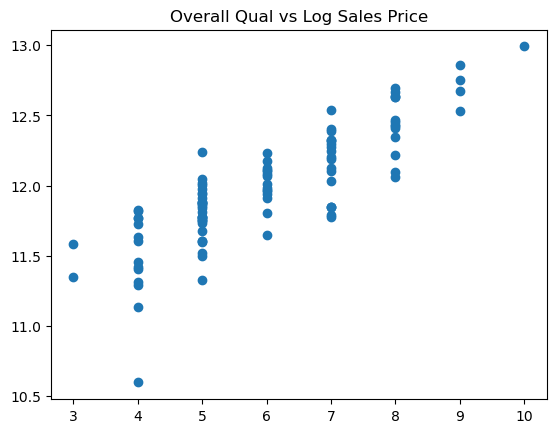

In [88]:
plt.scatter(train2['OverallQual'], train2['SalePrice'])
plt.title('Overall Qual vs Log Sales Price')

Text(0.5, 1.0, 'BsmtQual vs Log Sales Price')

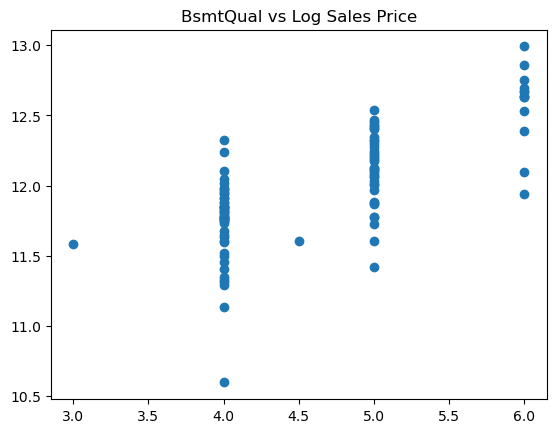

In [89]:
plt.scatter(train2['BsmtQual'], train2['SalePrice'])
plt.title('BsmtQual vs Log Sales Price')

Text(0.5, 1.0, 'GrLivArea vs Log Sales Price')

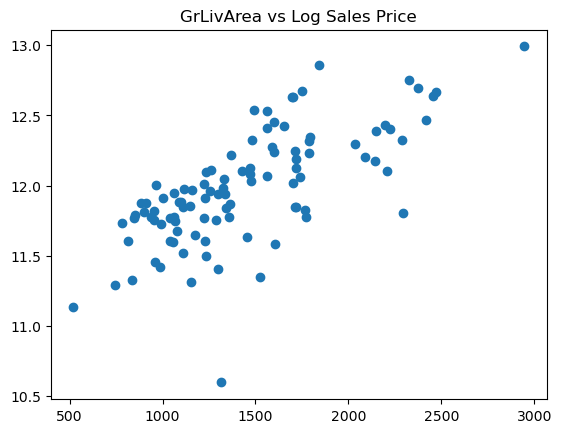

In [90]:
plt.scatter(train2['GrLivArea'], train2['SalePrice'])
plt.title('GrLivArea vs Log Sales Price')

Text(0.5, 1.0, 'YearBuilt vs Log Sales Price')

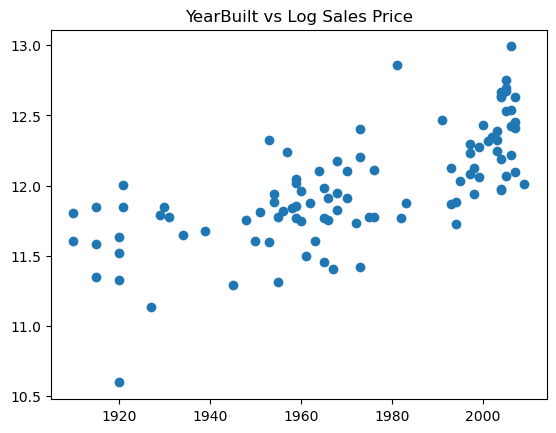

In [91]:
plt.scatter(train2['YearBuilt'], train2['SalePrice'])
plt.title('YearBuilt vs Log Sales Price')

Text(0.5, 1.0, 'KitchenQual vs Log Sales Price')

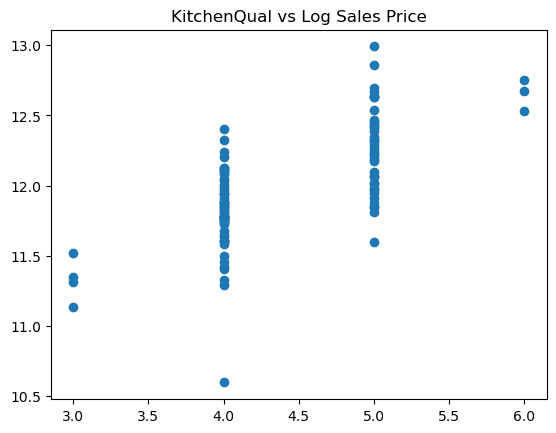

In [92]:
plt.scatter(train2['KitchenQual'], train2['SalePrice'])
plt.title('KitchenQual vs Log Sales Price')

Text(0.5, 1.0, 'ExterQual vs Log Sales Price')

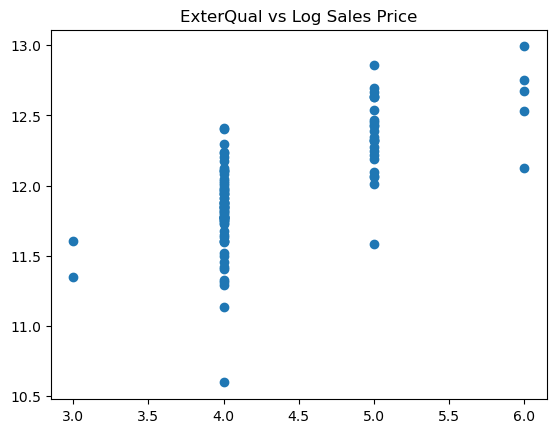

In [93]:
plt.scatter(train2['ExterQual'], train2['SalePrice'])
plt.title('ExterQual vs Log Sales Price')

Text(0.5, 1.0, 'GarageArea vs Log Sales Price')

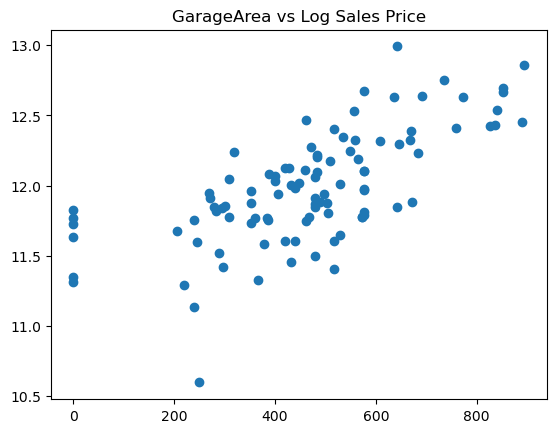

In [94]:
plt.scatter(train2['GarageArea'], train2['SalePrice'])
plt.title('GarageArea vs Log Sales Price')

Text(0.5, 1.0, 'GarageCars vs Log Sales Price')

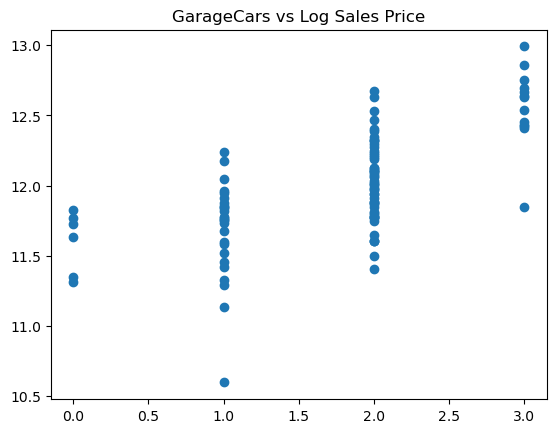

In [95]:
plt.scatter(train2['GarageCars'], train2['SalePrice'])
plt.title('GarageCars vs Log Sales Price')

Text(0.5, 1.0, 'TotalBsmtSF vs Log Sales Price')

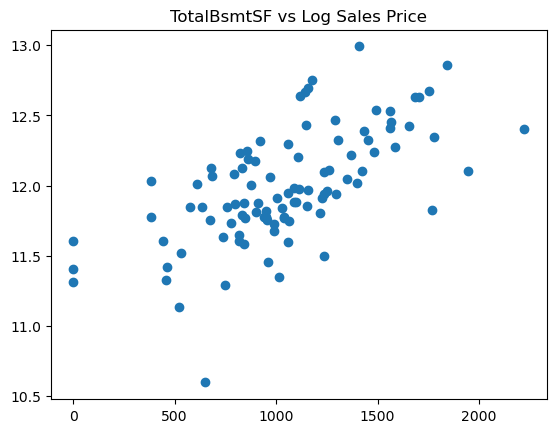

In [96]:
plt.scatter(train2['TotalBsmtSF'], train2['SalePrice'])
plt.title('TotalBsmtSF vs Log Sales Price')

Text(0.5, 1.0, 'GarageYrBlt vs Log Sales Price')

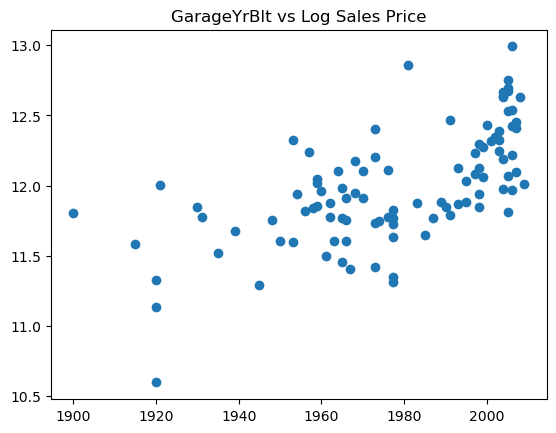

In [97]:
plt.scatter(train2['GarageYrBlt'], train2['SalePrice'])
plt.title('GarageYrBlt vs Log Sales Price')

Text(0.5, 1.0, 'YearRemodAdd vs Log Sales Price')

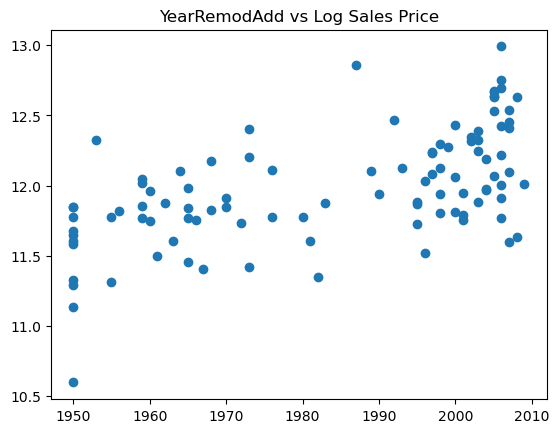

In [98]:
plt.scatter(train2['YearRemodAdd'], train2['SalePrice'])
plt.title('YearRemodAdd vs Log Sales Price')

Text(0.5, 1.0, 'FullBath vs Log Sales Price')

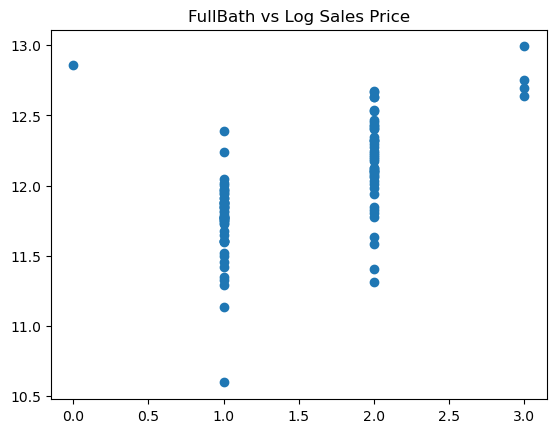

In [99]:
plt.scatter(train2['FullBath'], train2['SalePrice'])
plt.title('FullBath vs Log Sales Price')

Text(0.5, 1.0, '1stFlrSF vs Log Sales Price')

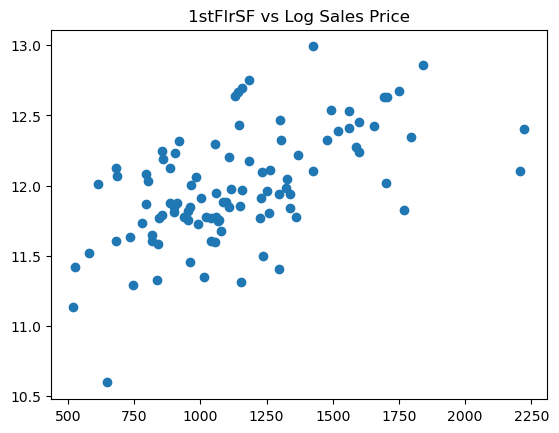

In [100]:
plt.scatter(train2['1stFlrSF'], train2['SalePrice'])
plt.title('1stFlrSF vs Log Sales Price')

Text(0.5, 1.0, 'MasVnrArea vs Log Sales Price')

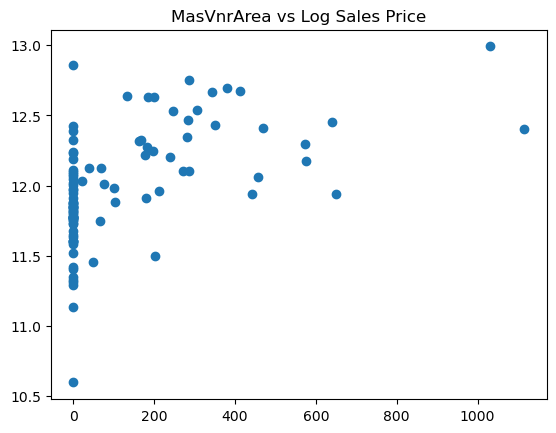

In [101]:
plt.scatter(train2['MasVnrArea'], train2['SalePrice'])
plt.title('MasVnrArea vs Log Sales Price')

Text(0.5, 1.0, 'TotRmsAbvGrd vs Log Sales Price')

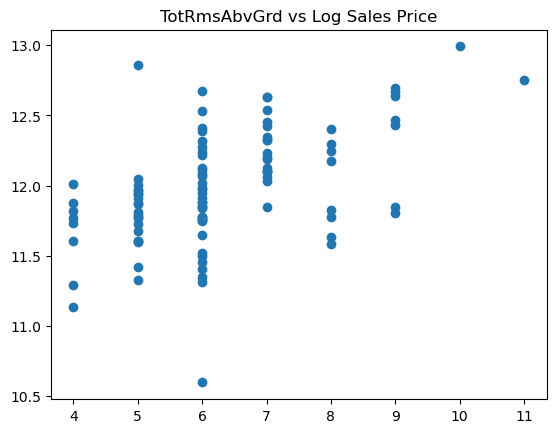

In [102]:
plt.scatter(train2['TotRmsAbvGrd'], train2['SalePrice'])
plt.title('TotRmsAbvGrd vs Log Sales Price')


[Back to top](#Index)

## 3. Project Description


My model improved upon Dr.Williams in several ways.
1. I converted 6 different string variables of quality to numeric.  Several of these were highly correlated 
    BsmtQual, KitchenQual, and ExterQual 
2. I tested One-Hot Encoding and Converted another variable to numeric based on specific values.  These variables didn't pop in terms of correlation.
3. I filled in mean values for 2 varaiables where they had null values. This appeared to have less of an impact on the overall model performance
4. I increased the number of variables in the model to include all variables with a correlation greater than .5.  This improved the model significantly.  Including every variable that had a 0.5 correlation was highly effective.

In total this allowed me to increase the Rsquared in the Test Data to 0.8189.


[Back to top](#Index)

### 3.1 Linear Regression

Sir Francis Galton is credited with originally coming up with the idea of correlation and regression, while Karl Pearson applied a rigorous treatment of mathematics. (https://www.tandfonline.com/doi/pdf/10.1080/10691898.2001.11910537#:~:text=Although%20Pearson%20did%20develop%20a,notions%20of%20correlation%20and%20regression.)

I used the Scikit-Learn package in python to help me build a Linear Regression model so that I can predict the Sales Price based on a variety of Independant Variables.  Sales Price can be considered a numeric variable, we would use a regression technique vs. a Classification technique which would be used if you were trying to predict a categorical or discrete value.

At it's most simple level, Linear regression is used to predict the value of a variable based on the value of other variables.  Since I will be using multiple variables, it would be called multiple linear regression.  You end up with one equation that includes all the dependent variables.

The model that gets created applies a coefficient to each of the independant variables in order to predict the dependent variable.

One assumption the linear regression model assumes is that the relationship between Y and X variables is linear.

So in order to generate, apply, and test within python there are a few key steps and methods we put to use after cleansing our data.
1. Create 2 datasets (Independent Variables, Dependent Variable (Variable Trying to Predict)
2. Create the equation by using the linear_model.LinearRegression.fit method in order to determine the relationship between your independant Variables and dependent variables.
3. Now that you have an equation, you can predict your depenent variable by using the predict method on your model and feeding in your independent variables
4. You can also compare what your prediction is with the actual on your training.  This is going to give you an R squared value that is a score that determines the proportion of variance in the dependent variable that can be explained by the independent variables. 
5. This gives you an idea of how your model works on your training data, but you also need to test it on a separate set of data.  The model will always perform better on the data used to build the equation.
6. You can now apply the same model with the same variables on a different dataset so see if your model works well and can be predictive on new data which is ultimately the final goal.


[Back to top](#Index)

### 3.2 Analysis 

So I had created 4 models and 4 sets of variables during my correlation step above.  I chose to decide based on different correlation cutoffs.  Does more variables with lesser correlation values work better than less variables with stronger correlation values. I could see an argument supporting both methods. I thought this would be an interesting test in comparing the performance of the models.  



In [103]:
# Correlation > .5

X = train2[cols]
Y = train2['SalePrice']
X = X.drop(['SalePrice'], axis = 1)

#build linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
model.score(X,Y)


0.8637770425104339

In [104]:
## Correlation > .8 (1 Variable)

X2 = train2[cols2]
Y2 = train2['SalePrice']
X2 = X2.drop(['SalePrice'], axis = 1)
#build linear regression model

lr2 = linear_model.LinearRegression()
model2 = lr2.fit(X2, Y2)
predictions2 = model2.predict(X2)
model2.score(X2,Y2)
#print(predictions)

0.7112553542358593

In [105]:
# Correlation Variables > .7 

X3 = train2[cols3]
Y3 = train2['SalePrice']
X3 = X3.drop(['SalePrice'], axis = 1)
#build linear regression model
from sklearn import linear_model
lr3 = linear_model.LinearRegression()
model3 = lr3.fit(X3, Y3)
predictions3 = model3.predict(X3)
model3.score(X3,Y3)
#print(predictions)

0.7687162505176008

In [106]:
# Correlation Variables > .6 

X4 = train2[cols4]
Y4 = train2['SalePrice']
X4 = X4.drop(['SalePrice'], axis = 1)
#build linear regression model
from sklearn import linear_model
lr4 = linear_model.LinearRegression()
model4 = lr4.fit(X4, Y4)
predictions4 = model4.predict(X4)
model4.score(X4,Y4)
#print(predictions)

0.8564349233344934

[Back to top](#Index)

### 3.3 Results

So I created 4 models and tested based on correlation cutoffs.  Here is a summary of my findings.

1. >.5 Correlation (15 variables) Had a Train Rsquared = 0.8637770425104339 
2. >.6 Correlation (10 variables) Had a Train Rsquared = 0.8564349233344934 
3. >.7 Correlation (3 variables) Had a Train Rsquared = 0.7687162505176008 
4. >.8 Correlation (1 variables) Had a Train Rsquared = 0.7112553542358593 

I provided a histogram and scatter plot of the model that performed the best and that I expect to test out the best.
The scatter plot and histogram are extemely tight and this makes sense as an Rsquared Value of 0.86 shows a very predictive model.


Text(0.5, 1.0, 'Prediction minus Actual')

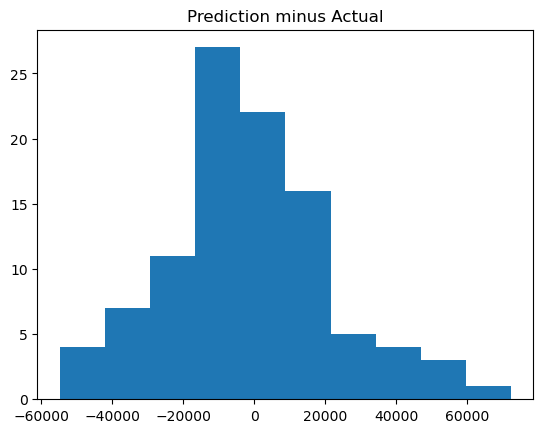

In [107]:
plt.hist(np.exp(predictions)-np.exp(Y))
plt.title('Prediction minus Actual')

Text(0, 0.5, 'Actual')

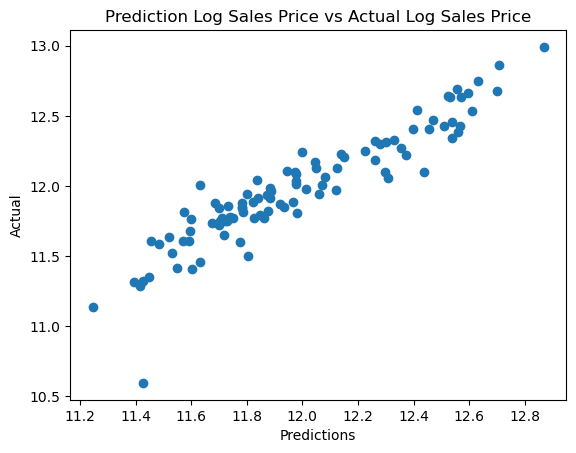

In [108]:
plt.scatter(predictions, Y)
plt.title('Prediction Log Sales Price vs Actual Log Sales Price')
plt.xlabel('Predictions')
plt.ylabel('Actual')

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

So I created 4 models and tested based on correlation cutoffs.  Here is a summary of my findings.

1. >.5 Correlation (15 variables) Had a Train Rsquared = 0.8637770425104339 and Test Rsquared = 0.8189396946525589
2. >.6 Correlation (10 variables) Had a Train Rsquared = 0.8564349233344934 and Test Rsquared = 0.7958328005776901
3. >.7 Correlation (3 variables) Had a Train Rsquared = 0.7687162505176008 and Test Rsquared = 0.735169602238696
4. >.8 Correlation (1 variables) Had a Train Rsquared = 0.7112553542358593 and Test Rsquared = 0.5925610363566232

The Train and Test Rsquared moved in the same direction.  So the higher correlation and less variables provided a poorer performing model.  As you allowed more variables.  The model tested stronger.

In addition, I don't have this included but when I didn't use the new variables I had created (like KitchenQual, etc.), I got lesser results even with the same cutoffs.  It goes to show that modeling data is part art and part math.

The results make sense as the rsquared improved in both train and test as you include variables with at least a greater then 0.5 correlation factor.

[Back to top](#Index)

### Verify Your Model Against Test Data

The following section is a read and reformat of the Test data.  I did exactly as I did with the training data to make sure my testing was valid.  You would not want to treat your test data different than the training data.

In [109]:
test = pd.read_csv('jtest.csv')
test['LotFrontage'].fillna(test['LotFrontage'].mean(), inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean(), inplace=True)
test['GarageQual'] = test['GarageQual'].map({'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NA': 1, 'Na': 1 })
test['KitchenQual'] = test['KitchenQual'].map({'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NA': 1, 'Na': 1 })    
test['ExterQual'] = test['ExterQual'].map({'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NA': 1, 'Na': 1 })
test['ExterCond'] = test['ExterCond'].map({'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NA': 1, 'Na': 1 })    
test['BsmtQual'] = test['BsmtQual'].map({'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NA': 1, 'Na': 1 })    
test['BsmtCond'] = test['BsmtCond'].map({'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NA': 1, 'Na': 1 })  
test2 = test.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)

salePricex = test2['SalePrice']
test2['SalePrice'] = np.log(salePricex)

In [110]:
# >.5
Xt = test2[cols]
Yt = Xt['SalePrice']
Xt = Xt.drop(['SalePrice'], axis = 1)
predictions = model.predict(Xt)
print(f"R^2 is: {model.score(Xt,Yt)}")

R^2 is: 0.8189396946525589


In [111]:
# ## > .8 
Xt = test2[cols2]
Yt = Xt['SalePrice']
Xt = Xt.drop(['SalePrice'], axis = 1)

predictions2 = model2.predict(Xt)
print(f"R^2 is: {model2.score(Xt,Yt)}")

R^2 is: 0.5925610363566232


In [112]:
# TEST # > .7 
Xt = test2[cols3]
Yt = Xt['SalePrice']
Xt = Xt.drop(['SalePrice'], axis = 1)

predictions3 = model3.predict(Xt)
print(f"R^2 is: {model3.score(Xt,Yt)}")

R^2 is: 0.735169602238696


In [113]:
# TEST # > .6 
Xt = test2[cols4]
Yt = Xt['SalePrice']
Xt = Xt.drop(['SalePrice'], axis = 1)
predictions4 = model4.predict(Xt)
print(f"R^2 is: {model4.score(Xt,Yt)}")

R^2 is: 0.7958328005776901


[Back to top](#Index)

#### Final Proofing

Some final visualizations and proofing on my winning model is as follows.  I have plotted a histogram of the delta between actual and predicted sales price.  I also created a scatter plot with actual sales price on one axis and predicted sales price on another.  You see strong correlation between the two.

In [114]:
#Convert Back

test2['SalePrice'] = np.exp(Yt)
test2['SalePrice_Prediction'] = np.exp(predictions)

Text(0.5, 1.0, 'Prediction minus Actual')

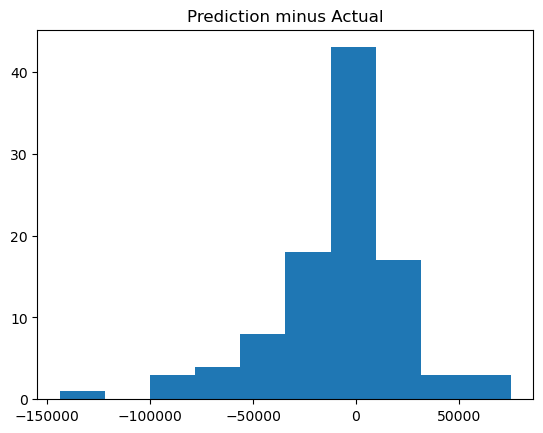

In [115]:
#Histogram of Difference Between Prediction and Actual on Test Data

plt.hist(np.exp(predictions)-np.exp(Yt))
plt.title('Prediction minus Actual')


Text(0, 0.5, 'Actual')

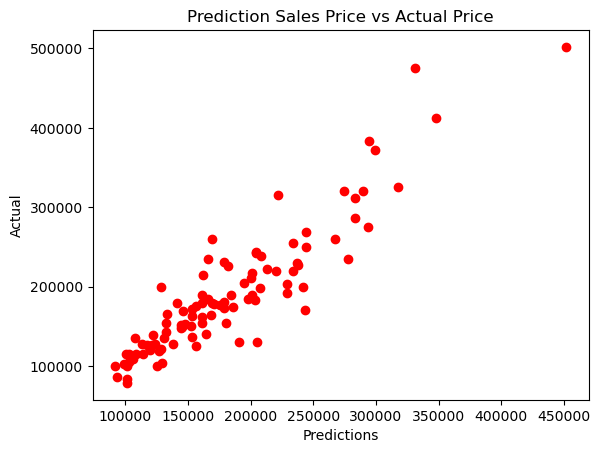

In [116]:
plt.scatter(np.exp(predictions), np.exp(Yt), color = 'r')
plt.title('Prediction Sales Price vs Actual Price')
plt.xlabel('Predictions')
plt.ylabel('Actual')

[Back to top](#Index)

## Conclusion

So for me, I concluded more variables worked better and converting string variables to numerics can have a huge impact.  Those two methods proved most effective in this situation. I also learned that you can continue to massage data.  I feel like I could continue to massage the data to add more value.  I started with conversions that made intuitive sense.  For example,  I thought a Kitchen Quality variable is huge as people love a good kitchen. And it made sense this had a powerful impact on the model.

Not everything you test will be effective.   I tested out one-hot encoding on many variables.  They did not pop in my model, but thats not to say there couldnt be versions that might have. 

In the real world, you need to continue to test and train your models as your data evolves and changes.  You need to be careful not to over fit your models on your testing data.  This can impact the power of your model on new data as it comes in because the model is too tightly fit on a specific set of data.  


[Back to top](#Index
)
## References


https://www.geeksforgeeks.org/how-to-calculate-skewness-and-kurtosis-in-python/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://www.activestate.com/resources/quick-reads/how-to-run-linear-regressions-in-python-scikit-learn/

https://en.wikipedia.org/wiki/Linear_regression

Taylor, Sebastian “R-Squared”  https://corporatefinanceinstitute.com/resources/data-science/r-squared/#:~:text=R%2DSquared%20(R%C2%B2%20or%20the,(the%20goodness%20of%20fit).

https://www.ibm.com/topics/linear-regression#:~:text=Resources-,What%20is%20linear%20regression%3F,is%20called%20the%20independent%20variable.

https://www.tandfonline.com/doi/pdf/10.1080/10691898.2001.11910537#:~:text=Although%20Pearson%20did%20develop%20a,notions%20of%20correlation%20and%20regression.


